<a href="https://colab.research.google.com/github/Thiago-Reis-Porto/treinamento-h2ia/blob/main/Algoritimo_Genetico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center><b>Problema da mochila</h1><h1><center>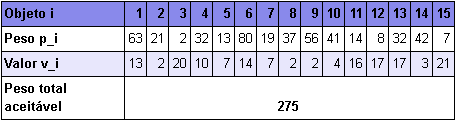

In [ ]:
import numpy.random as nr

In [ ]:
weight_capacity = 275
wv_i = [(63,13), (21,2), (2,20), (32,10), (13, 7), (80,14), (19,7), (37,2), (56,2), (41,4), (14,16), (8, 17), (32,17), (42,3), (7,21)]

#Code

In [ ]:
#Gera Soluções Aleatorias(população) e avalia
# Individuo da população = (fitness, indiv)
def generate_population(pop_size):
  pop_sample = nr.randint(32768, size=pop_size)
  population = []
  for i in pop_sample:
    individual = (solution_fitness(i), i)
    insert_individual(individual, population)
  return population

In [ ]:
def insert_individual(new_indiv, population):
    i = 0
    while i < len(population):
      if population[i][0] < new_indiv[0]:
        break
      i+=1
    population.insert(i, new_indiv)

In [ ]:
#Decodifica Solução e retorna seu peso e valor
def decode_solution(solution):
  weight, value = 0, 0
  for i in range(15):
    bit = (solution >> i) & 1
    if bit:
      weight += wv_i[i][0]
      value += wv_i[i][1]
  return weight, value

In [ ]:
#Pega o fitness da solução, é zero se ultrapassar o limite de peso da mochila senão é o peso
def solution_fitness(solution):
  weight, value = decode_solution(solution)
  if weight > weight_capacity:
    return value - weight
  else: return value

In [ ]:
#Muta um bit da solução
def mutate(solution): 
  index = nr.randint(15)
  mutated_solution = solution[1] ^ 1 << index
  mutated_fitness = solution_fitness(mutated_solution)
  return mutated_fitness, mutated_solution

In [ ]:
nr.randint(1,3)

2

In [ ]:
#Cruzamento retorna dois filhos a partir de dois genomas
def crossover(parent_1, parent_2, crossover_rate):
  cut_1 = nr.randint(1,15)
  cut_2 = 15-cut_1
  cr = nr.random()
  if cr <= crossover_rate:
    # p1, p2 = bin(parent_1[1])[2:], bin(parent_2[1])[2:]
    # solutions = int(p1[:cut] + p2[cut:],2), int(p2[:cut] + p1[cut:],2)
    # children = [(solution_fitness(s), s) for s in solutions]
    parent_1_cuts = parent_1[1] >> cut_2, parent_1[1] &(32767 >> cut_1)
    parent_2_cuts = parent_2[1] >> cut_2, parent_2[1] &(32767 >> cut_1)

    child_1 = parent_1_cuts[0] << cut_2 | parent_2_cuts[1]
    child_2 = parent_2_cuts[0] << cut_2 | parent_1_cuts[1] 
  
    return [(solution_fitness(child_1), child_1), (solution_fitness(child_2), child_2)]
    # return children
  return [parent_1, parent_2]

In [ ]:
normalized_fitness = lambda fitness, abs_min_fit: fitness + abs_min_fit + 1
#Seleciona dois pais
def parent_selection(population):
  min_fit = abs(population[-1][0])
  fit_sum = 0
  for i in population: fit_sum += normalized_fitness(i[0], min_fit)
  # fit_sum = sum([normalized_fitness(i[0], min_fit) for i in population])
  # aux = normalized_fitness(population[0][0], min_fit)
  # i=0
  # p = random.randrange(1,fit_sum)
  # while aux < p:
  #   i+=1
  #   aux += normalized_fitness(population[i][0], min_fit)
  # return population[i]
  selection_probs = [normalized_fitness(i[0], min_fit)/fit_sum for i in population]
  return population[nr.choice(len(population), p=selection_probs)]

In [ ]:
def genetic_knapsack(pop_size=10, mutation_rate=0.03, crossover_rate=0.9, n_generations=5, n_elitism=1):

  if pop_size < 1 | n_generations < 1 | n_elitism > pop_size:
    return
  
  #inicializa população e a avalia
  population = generate_population(pop_size)
  rest_pop, odd = divmod(pop_size - n_elitism, 2)

  for g in range(n_generations):
    next_gen = []
    for j in range(n_elitism):
      next_gen.append(population[j])
    
    for i in range(rest_pop):
      p1, p2 = parent_selection(population), parent_selection(population)
      children = crossover(p1, p2, crossover_rate)
      for c in children:
        mutation = nr.random()
        if mutation <= mutation_rate: c = mutate(c)
        insert_individual(c, next_gen)
    
    if odd:
      p = parent_selection(population)
      mutation = nr.random()
      if mutation <= mutation_rate: p = mutate(p)
      insert_individual(p, next_gen)
       
    population = next_gen
    
  return pop_size, mutation_rate, crossover_rate, n_generations, n_elitism, population[0]

In [ ]:
def print_result(result):
 
  pop_size, mutation_rate, crossover_rate, \
  n_generatios, n_elitism, best_solution = result

  print("Tamanho da População: ", pop_size)
  print(f"Probalidade de Mutação: {mutation_rate*100:g}%")
  print(f"Probalidade de Cruzamento: {crossover_rate*100:g}%")
  print("Número de gerações: ", n_generatios)
  print("Elitismo: ", n_elitism)
  weight, value = decode_solution(best_solution[1])
  items = []
  for i in range(15):
    bit = (best_solution[1] >> i) & 1
    if bit:
      items.append(i+1)
  print("Melhor Solução: \n-Codificação:",bin(best_solution[1]),"\n-Items:",items,  "\n-Peso:",weight, "\n-Valor:", value)

#Result

In [ ]:
result = genetic_knapsack(
              pop_size=100,
              mutation_rate=0.03,
              crossover_rate=0.9,
              n_generations=200,
              n_elitism=5
         )
print_result(result)

Tamanho da População:  100
Probalidade de Mutação: 3%
Probalidade de Cruzamento: 90%
Número de gerações:  200
Elitismo:  5
Melhor Solução: 
-Codificação: 0b101110001111101 
-Items: [1, 3, 4, 5, 6, 7, 11, 12, 13, 15] 
-Peso: 270 
-Valor: 142
